In [ ]:
from google.colab import drive 
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd/gdrive/My Drive/TB spread pattern

/gdrive/My Drive/TB spread pattern


In [ ]:
ls

'tubercolusis_from 2007_WHO.csv'   tuberculosis_data_WHO.csv


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv('tubercolusis_from 2007_WHO.csv')
df.head()

,Country,Year,"Number of deaths due to tuberculosis, excluding HIV","Number of deaths due to tuberculosis, excluding HIV (Start range)","Number of deaths due to tuberculosis, excluding HIV (End range)",Number of prevalent tuberculosis cases,Number of prevalent tuberculosis cases (Start range),Number of prevalent tuberculosis cases (End range),Deaths due to tuberculosis among HIV-negative people (per 100 000 population),Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (Start range),Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (End range),Prevalence of tuberculosis (per 100 000 population),Prevalence of tuberculosis (per 100 000 population)(start range),Prevalence of tuberculosis (per 100 000 population)(end range)
0,Afghanistan,2014,14 000,10 000,18 000,110 000,56 000,180 000,44.0,32.0,57.0,340,178.0,555
1,Afghanistan,2013,13 000,9 300,17 000,100 000,54 000,170 000,42.0,30.0,55.0,333,175.0,541
2,Afghanistan,2012,12 000,8 700,16 000,98 000,51 000,160 000,40.0,29.0,53.0,329,173.0,536
3,Afghanistan,2011,11 000,8 300,15 000,94 000,50 000,150 000,40.0,29.0,52.0,327,172.0,530
4,Afghanistan,2010,11 000,8 000,14 000,91 000,48 000,150 000,39.0,29.0,52.0,325,171.0,528


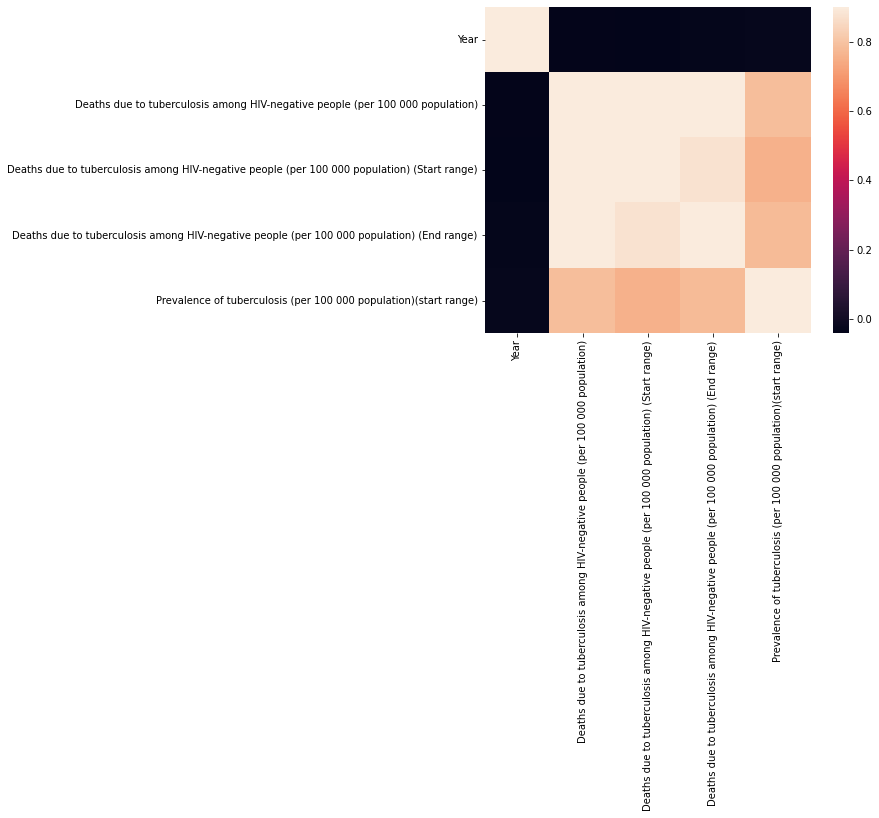

In [ ]:
corrmat = df.corr(method='kendall')
plt.subplots(figsize=(8,6))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
df.isnull().sum()

Country                                                                                         0
Year                                                                                            0
Number of deaths due to tuberculosis, excluding HIV                                             0
Number of deaths due to tuberculosis, excluding HIV (Start range)                              20
Number of deaths due to tuberculosis, excluding HIV (End range)                                20
Number of prevalent tuberculosis cases                                                          0
Number of prevalent tuberculosis cases (Start range)                                            0
Number of prevalent tuberculosis cases (End range)                                              4
Deaths due to tuberculosis among HIV-negative people (per 100 000 population)                   0
Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (Start range)    20
Deaths due to tuberc

In [ ]:
df[['Number of prevalent tuberculosis cases (End range)', 'Number of deaths due to tuberculosis, excluding HIV (Start range)', 'Number of deaths due to tuberculosis, excluding HIV (End range)','Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (Start range)', 'Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (End range)']] = df[['Number of prevalent tuberculosis cases (End range)', 'Number of deaths due to tuberculosis, excluding HIV (Start range)', 'Number of deaths due to tuberculosis, excluding HIV (End range)', 'Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (Start range)', 'Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (End range)']].fillna('NA')

In [ ]:
df = df.fillna(value = {'Number of prevalent tuberculosis cases (End range)' : 'no_info', 
                           'Number of deaths due to tuberculosis, excluding HIV (Start range)' : 'no_info', 
                           'Number of deaths due to tuberculosis, excluding HIV (End range)':'no_info',
                          'Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (Start range)' : 'no_info',
                           'Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (End range)' : 'no_info'})

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ('Country', 'Number of deaths due to tuberculosis, excluding HIV', 'Number of deaths due to tuberculosis, excluding HIV (Start range)', 'Number of deaths due to tuberculosis, excluding HIV (End range)', 'Number of prevalent tuberculosis cases', 'Number of prevalent tuberculosis cases (Start range)', 'Number of prevalent tuberculosis cases (End range)', 'Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (Start range)', 'Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (End range)', 'Prevalence of tuberculosis (per 100 000 population)', 'Prevalence of tuberculosis (per 100 000 population)(end range)')
for col in categorical_col:
    label = LabelEncoder() 
    label.fit(list(df[col].values)) 
    df[col] = label.transform(list(df[col].values))

print('Shape all_data: {}'.format(df.shape))

Shape all_data: (1548, 14)


In [ ]:
from scipy.stats import norm, skew
num_features = df.dtypes[df.dtypes != 'object'].index
skewed_features = df[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(15)

,Skew
Prevalence of tuberculosis (per 100 000 population)(start range),2.109482
Deaths due to tuberculosis among HIV-negative people (per 100 000 population),1.762497
Number of prevalent tuberculosis cases (End range),0.721318
Number of prevalent tuberculosis cases,0.441176
Prevalence of tuberculosis (per 100 000 population)(end range),0.356556
Number of prevalent tuberculosis cases (Start range),0.355494
Prevalence of tuberculosis (per 100 000 population),0.254886
Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (Start range),0.081630
"Number of deaths due to tuberculosis, excluding HIV (End range)",0.055232
Deaths due to tuberculosis among HIV-negative people (per 100 000 population) (End range),0.005205


#Skew Visualization - Visualize each numerical feature with distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

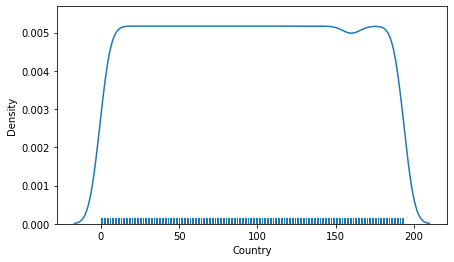

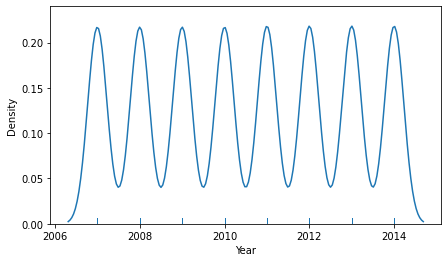

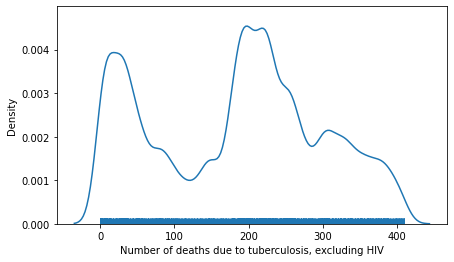

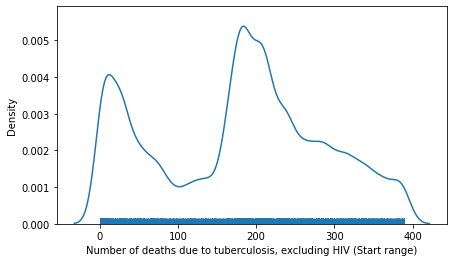

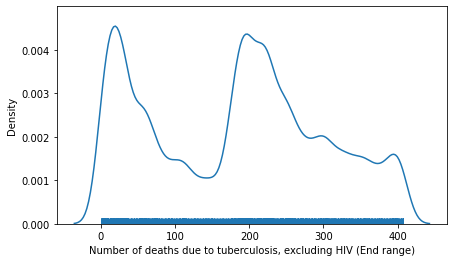

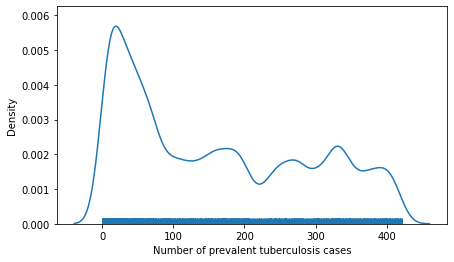

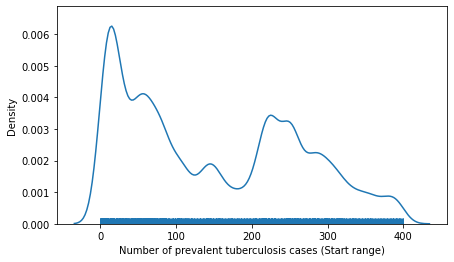

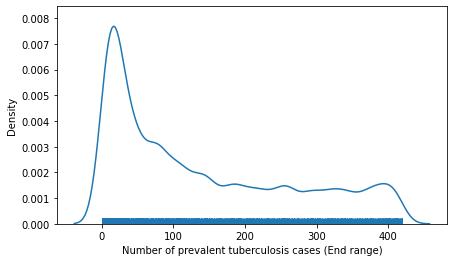

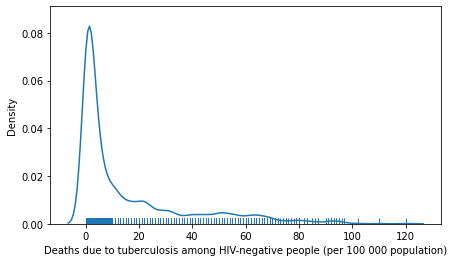

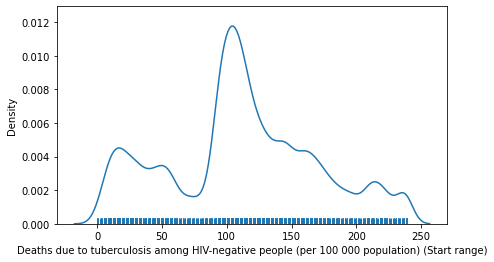

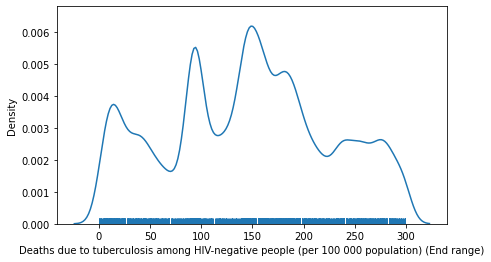

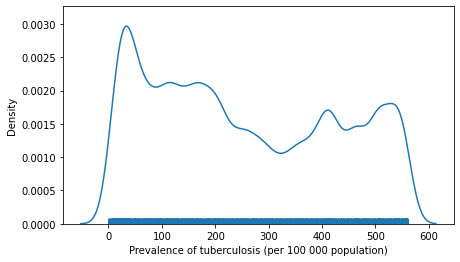

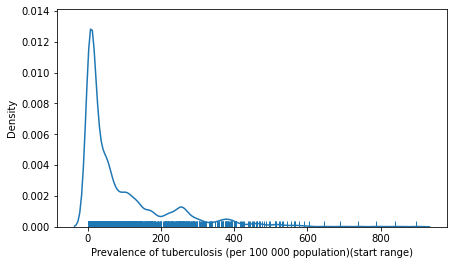

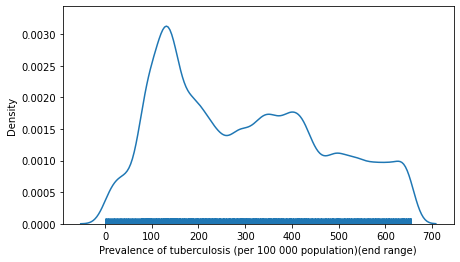

In [ ]:
numerical_df = df.select_dtypes(exclude='object')
for i in range(len(numerical_df.columns)):
    f, ax = plt.subplots(figsize=(7, 4))
    fig = sns.distplot(numerical_df.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(numerical_df.columns[i])

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df) 
X = df[:len(df)]
test = df[len(df):]

X.shape

(1548, 14)

In [ ]:
y = df.Year.values
df.drop(['Year'], axis=1, inplace=True)
df = pd.concat((df, test)).reset_index(drop=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [ ]:
from xgboost import XGBRegressor
xgboost = make_pipeline(RobustScaler(),
                        XGBRegressor(learning_rate =0.01, n_estimators=3460, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,nthread=4,
                                     scale_pos_weight=1,seed=27, 
                                     reg_alpha=0.00006))
xgboost_score = cross_val_score(xgboost, X, y, cv=kfolds, scoring='neg_mean_squared_error')
xgboost_rmse = np.sqrt(-xgboost_score.mean())
print("XGBOOST RMSE: ", xgboost_rmse)
print("XGBOOST STD: ", xgboost_score.std())

[08:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:44:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBOOST RMSE:  0.00784265527777847
XGBOOST STD:  2.0551493729102002e-05


In [ ]:
df_tunning = df
y = df_tunning.iloc[:,1]
X = pd.concat([df_tunning.iloc[:,0],df_tunning.iloc[:,2:30]], axis=1)

In [ ]:
y_model = df.iloc[:,1]
X_model = pd.concat([df_tunning.iloc[:,0],df_tunning.iloc[:,2:30]], axis=1)
y_model.describe()

count    1548.000000
mean      184.252584
std       115.291660
min         0.000000
25%        71.750000
50%       199.000000
75%       262.250000
max       409.000000
Name: Number of deaths due to tuberculosis, excluding HIV, dtype: float64